In [4]:
import psycopg2
from dotenv import load_dotenv
import os

load_dotenv()

conn = psycopg2.connect(
    host=os.getenv('POSTGRES_HOST'),
    database=os.getenv('POSTGRES_DATABASE'),
    user=os.getenv('POSTGRES_USER'),
    password=os.getenv('POSTGRES_PASSWORD'),
    port=os.getenv('POSTGRES_PORT')
)

cur = conn.cursor()

In [5]:
import mysql.connector
from dotenv import load_dotenv
import os

load_dotenv()

conn_mysql = mysql.connector.connect(
    host=os.getenv('MYSQL_HOST'),
    database=os.getenv('MYSQL_DATABASE'),
    user=os.getenv('MYSQL_USER'),
    password=os.getenv('MYSQL_PASSWORD')
)

cur_mysql = conn_mysql.cursor()

In [9]:
import pandas as pd

query = """
SELECT id_venda, cod_produto, nome_produto, categoria_produto, segmento_produto, 
       marca_produto, cod_vendedor, nome_vendedor, cod_loja, cidade_loja, 
       estado_loja, data_venda, valor_venda
FROM datadt_curso_python.vendas
"""

df = pd.read_sql(query, conn_mysql)
df

C:\Users\jaimejunior0582\AppData\Local\Temp\ipykernel_8744\489745551.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn_mysql)


,id_venda,cod_produto,nome_produto,categoria_produto,segmento_produto,marca_produto,cod_vendedor,nome_vendedor,cod_loja,cidade_loja,estado_loja,data_venda,valor_venda
0,1,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,1009,Ana Teixeira,SP8821,São Paulo,São Paulo,2012-10-04,679.00
1,2,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,2012-01-01,832.00
2,3,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,2012-02-02,790.00
3,4,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1003,Mateus Gonçalves,SP8821,São Paulo,São Paulo,2012-03-03,765.32
4,5,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,1004,Artur Moreira,SP8821,São Paulo,São Paulo,2012-04-04,459.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1002,André Pereira,R1295,Rio de Janeiro,Rio de Janeiro,2015-09-23,1234.00
453,454,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1002,André Pereira,R1295,Rio de Janeiro,Rio de Janeiro,2015-10-24,1234.00
454,455,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola,1008,Aline Sutter,R1295,Rio de Janeiro,Rio de Janeiro,2015-11-25,1230.00
455,456,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1002,André Pereira,R1295,Rio de Janeiro,Rio de Janeiro,2015-11-26,1234.00


In [15]:
import pandas as pd

query_pg = """
SELECT 'Empresa 02' as Empresa, date_part('Year', data_venda) as Ano, sum(valor) as Venda
FROM vendas.nota_fiscal
GROUP BY date_part('Year', data_venda)
"""

df_pg = pd.read_sql(query_pg, conn)
df_pg

C:\Users\jaimejunior0582\AppData\Local\Temp\ipykernel_8744\1530740329.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pg = pd.read_sql(query_pg, conn)


,empresa,ano,venda
0,Empresa 02,2015.0,28167840.0
1,Empresa 02,2016.0,29348852.0
2,Empresa 02,2017.0,31045856.0


In [12]:
df.info

<bound method DataFrame.info of      id_venda  cod_produto      nome_produto categoria_produto  \
0           1  SKU-0000001   LG K10 TV Power         Celulares   
1           2  SKU-0000002  Geladeira Duplex  Eletrodomésticos   
2           3  SKU-0000003    Lavadora 11 Kg  Eletrodomésticos   
3           4  SKU-0000004    Lavadora 11 Kg  Eletrodomésticos   
4           5  SKU-0000005    Lavadora 11 Kg  Eletrodomésticos   
..        ...          ...               ...               ...   
452       453  SKU-0000453  Geladeira Duplex  Eletrodomésticos   
453       454  SKU-0000454  Geladeira Duplex  Eletrodomésticos   
454       455  SKU-0000455  Morotola Moto G5         Celulares   
455       456  SKU-0000456  Geladeira Duplex  Eletrodomésticos   
456       457  SKU-0000457  Geladeira Duplex  Eletrodomésticos   

    segmento_produto marca_produto  cod_vendedor     nome_vendedor cod_loja  \
0        Corporativo            LG          1009      Ana Teixeira   SP8821   
1          Domést

In [13]:
df_pg.info

<bound method DataFrame.info of      ?column?  date_part         sum
0  Empresa 02     2015.0  28167840.0
1  Empresa 02     2016.0  29348852.0
2  Empresa 02     2017.0  31045856.0>

In [16]:
df['data_venda'] = pd.to_datetime(df['data_venda'])

df['ano'] = df['data_venda'].dt.year        

df_vendas_por_ano = df.groupby('ano')['valor_venda'].sum().reset_index()

df_vendas_por_ano['empresa'] = 'Empresa 01'

df_vendas_por_ano

,ano,valor_venda,empresa
0,2012,37503.74,Empresa 01
1,2013,93418.56,Empresa 01
2,2014,63322.02,Empresa 01
3,2015,166836.79,Empresa 01


In [17]:
df_pg

,empresa,ano,venda
0,Empresa 02,2015.0,28167840.0
1,Empresa 02,2016.0,29348852.0
2,Empresa 02,2017.0,31045856.0


In [18]:
df_pg_renamed = df_pg.rename(columns={'venda': 'valor_venda'})

df_uniao = pd.concat([df_vendas_por_ano, df_pg_renamed], ignore_index=True)

df_uniao

,ano,valor_venda,empresa
0,2012.0,37503.74,Empresa 01
1,2013.0,93418.56,Empresa 01
2,2014.0,63322.02,Empresa 01
3,2015.0,166836.79,Empresa 01
4,2015.0,28167840.00,Empresa 02
5,2016.0,29348852.00,Empresa 02
6,2017.0,31045856.00,Empresa 02


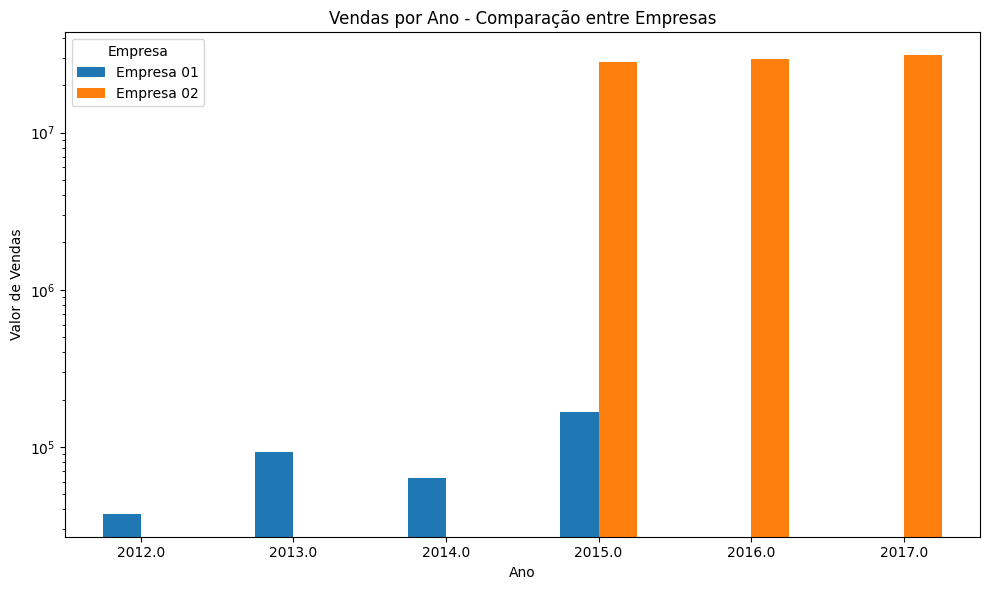

In [20]:
import matplotlib.pyplot as plt

df_pivot = df_uniao.pivot(index='ano', columns='empresa', values='valor_venda')

df_pivot.plot(kind='bar', figsize=(10, 6), logy=True)
plt.title('Vendas por Ano - Comparação entre Empresas')
plt.xlabel('Ano')
plt.ylabel('Valor de Vendas')
plt.xticks(rotation=0)
plt.legend(title='Empresa')
plt.tight_layout()
plt.show()